In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
data = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = data.load_data()

In [ ]:
X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

In [ ]:
X = X.reshape(X.shape[0], -1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
input_dim = X_train.shape[1]
encoding_dim = 32

input_layer = layers.Input(shape=(input_dim,))
encoder = layers.Dense(encoding_dim, activation='relu')(input_layer)

decoder = layers.Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = keras.Model(input_layer, decoder)

In [ ]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
history = autoencoder.fit(X_train, X_train,epochs=35,batch_size=256,validation_data=(X_test, X_test),shuffle=True)

Epoch 1/35
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.6618 - val_loss: 0.8396
Epoch 2/35
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.6573 - val_loss: 0.8393
Epoch 3/35
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.6371 - val_loss: 0.8391
Epoch 4/35
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.6561 - val_loss: 0.8389
Epoch 5/35
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.6491 - val_loss: 0.8386
Epoch 6/35
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.6600 - val_loss: 0.8383
Epoch 7/35
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.6722 - val_loss: 0.8382
Epoch 8/35
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6605 - val_loss: 0.8380
Epoch 9/35
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6552 - val_loss: 0.8378
Epoch 10/35
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6555 - val_loss: 0.8377
Epoch 11/35
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.6386 - val_loss: 0.8375
Epoch 12/35
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms

In [ ]:
X_test_pred = autoencoder.predict(X_test)

reconstruction_error = np.mean(np.square(X_test - X_test_pred), axis=1)

threshold = np.percentile(reconstruction_error, 95)  # 95th percentile

anomalies = reconstruction_error > threshold

print(f"Number of anomalies detected: {np.sum(anomalies)}")

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Number of anomalies detected: 700


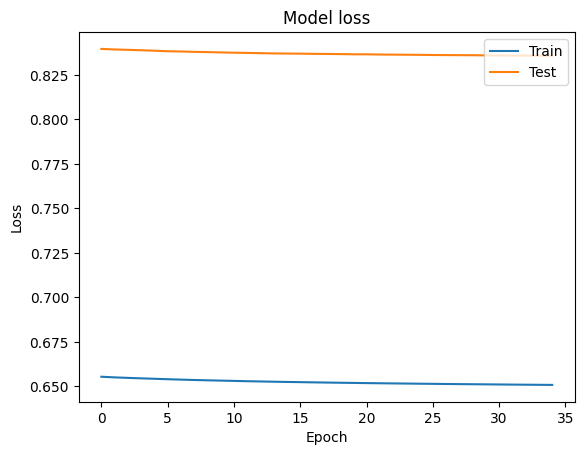

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()